In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
path="/content/drive/MyDrive/Project/survey lung cancer.csv"
df=pd.read_csv(path)
df.head()

,GENDER,AGE,SMOKING,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,YES
2,F,59,1,2,1,2,2,1,2,NO
3,M,63,2,1,2,1,1,2,2,NO
4,F,63,1,2,1,2,2,1,1,NO


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])


# Split into features (X) and target variable (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

          NO       0.33      0.50      0.40         2
         YES       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels by the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Confusion Matrix for Random Forest:
[[ 1  1]
 [ 2 58]]


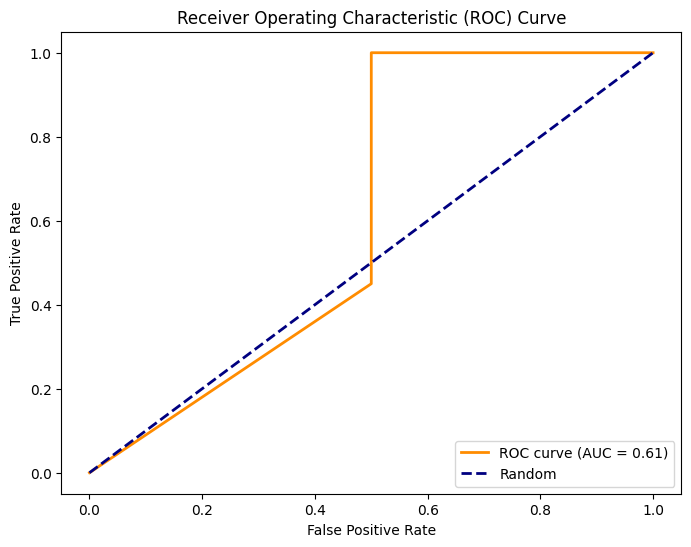

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert 'NO' and 'YES' to 0 and 1
y_test_binary = y_test.map({'NO': 0, 'YES': 1})

# Get the predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the number of neighbors (k)
k_value = 3  # You can adjust this value based on your preference

# Create a KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the testing set
knn_y_pred = knn_model.predict(X_test)

# Evaluate accuracy for KNN
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

# Display classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN Accuracy: 0.92
KNN Classification Report:
              precision    recall  f1-score   support

          NO       0.20      0.50      0.29         2
         YES       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the true labels and 'knn_y_pred' is the predicted labels by the KNN model
conf_matrix_knn = confusion_matrix(y_test, knn_y_pred)

# Print the confusion matrix
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)


Confusion Matrix for KNN:
[[ 1  1]
 [ 4 56]]


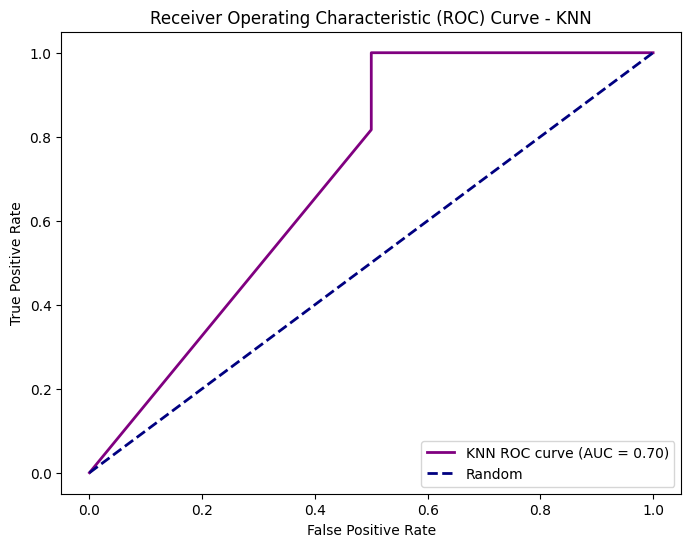

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
knn_y_probs = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for KNN
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test_binary, knn_y_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='purple', lw=2, label=f'KNN ROC curve (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()
